In [32]:
#物件(object)建構式:
class dengue:
    
    def __init__(self,編號,發生週別,性別,年齡,區別,里別):
        self.ID = 編號
        self.week = 發生週別
        self.sex = 性別
        self.age = 年齡
        self.dist = 區別
        self.result = 里別


In [33]:
#import 模組:


import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import matplotlib.pyplot as plt

#設定字體為標楷體'DFKai-sb':
from pylab import *
 
mpl.rcParams['font.sans-serif'] = ['DFKai-sb']

In [34]:
#讀取資料，建立dataframe

file_name=input('請輸入檔案名稱(不包括副檔名):')
file = open('D:\\YAO\\DATA\\YearlyDengue\\%s.csv'%file_name,encoding='big5')

data_list = []
for i in file.readlines():
    data = i.strip()
    data = data.split(',')
    data_list.append(data)
file.close()


file_df = pd.DataFrame(data_list[1:],columns=data_list[0])

condiction = input('是否列印DATAFRAME(y/n)：')
if condiction == 'y':
    print('csv資料前10項：')
    print(file_df.head(10))
    print('----------------')
    

請輸入檔案名稱(不包括副檔名):103登革熱確診個案一覽
是否列印DATAFRAME(y/n)：y
csv資料前10項：
   編號 發病週別 性別  年齡  區別  里別
0   1    3  男  54  鳳山  老爺
1   2   21  男  46  前鎮  草衙
2   3   21  女  37  小港  港后
3   4   22  男  53  前鎮  明孝
4   5   21  男  35  前鎮  明孝
5   6   21  女  60  前鎮  草衙
6   7   22  女  39  林園  廣應
7   8   22  女  33  旗津  中興
8   9   23  男  36  前鎮  明孝
9  10   22  男  40  前鎮  草衙
----------------


In [35]:
#建立物件:
file_df_column = file_df.columns

編號 = list(file_df.ix[:,file_df_column[0]])
發生週別 = list(file_df.ix[:,file_df_column[1]])
性別  = list(file_df.ix[:,file_df_column[2]])
年齡 = list(file_df.ix[:,file_df_column[3]])
區別  = list(file_df.ix[:,file_df_column[4]])
里別  = list(file_df.ix[:,file_df_column[5]])

#利用list建立物件
sample_ls = []
for i in range(len(file_df)):
    sample_ls.append(dengue(編號[i],發生週別[i],性別[i],年齡[i],區別[i],里別[i]))

In [36]:
#()切年紀 
def age_cutters():
    age_cutters = []
    i = 1
    print('切點為：[?-?]')
    while True:
        try:
            age_cutter_min = eval(input('請輸入第%d個區間範圍的最小值：'%i))
            age_cutter_max = eval(input('請輸入第%d個區間範圍的最大值：'%i))
            age_cutter = [age_cutter_min,age_cutter_max]
            age_cutters.append(age_cutter)
            print('第%d切點為：[%d-%d]'%(i,age_cutter_min,age_cutter_max))
            print('-------------------')
            i += 1
            ask = input('是否結束輸入(y/n):')
            if ask == 'y':
                break
        except:
            print('請輸入數字！！！')
    print('age_cutters：',age_cutters)
    print('--------已經切好年齡，物件名稱為：age_cutters---------')
    return age_cutters



In [37]:
#預設age_cutter:
age_cutter = [[0, 14], [15, 29], [30, 44], [45, 59], [60, 74], [75, 99]]


In [6]:
#更改age_cutter:
age_cutter = age_cutters()

切點為：[?-?]
請輸入第1個區間範圍的最小值：0
請輸入第1個區間範圍的最大值：14
第1切點為：[0-14]
-------------------
是否結束輸入(y/n):
請輸入第2個區間範圍的最小值：15
請輸入第2個區間範圍的最大值：29
第2切點為：[15-29]
-------------------
是否結束輸入(y/n):
請輸入第3個區間範圍的最小值：30
請輸入第3個區間範圍的最大值：44
第3切點為：[30-44]
-------------------
是否結束輸入(y/n):
請輸入第4個區間範圍的最小值：45
請輸入第4個區間範圍的最大值：59
第4切點為：[45-59]
-------------------
是否結束輸入(y/n):
請輸入第5個區間範圍的最小值：60
請輸入第5個區間範圍的最大值：74
第5切點為：[60-74]
-------------------
是否結束輸入(y/n):
請輸入第6個區間範圍的最小值：75
請輸入第6個區間範圍的最大值：99
第6切點為：[75-99]
-------------------
是否結束輸入(y/n):y
age_cutters： [[0, 14], [15, 29], [30, 44], [45, 59], [60, 74], [75, 99]]
--------已經切好年齡，物件名稱為：age_cutters---------


In [38]:
#(def)算各年齡層人數：需要 1.(def)age_cutters 2.(class_list)sample_ls
def sample_ls_age_cutted_count(age_cutters,sample_ls):
    age_count = []
    for i in range(len(age_cutters)):
        count = sum(age_cutters[i][0] <= int(p.age) <= age_cutters[i][1] for p in sample_ls)
        age_count.append(['[%d - %d]'%(age_cutters[i][0],age_cutters[i][1]),count])
    return age_count


In [39]:
age_cutted_number = sample_ls_age_cutted_count(age_cutter ,sample_ls)
age_cutted_number

[['[0 - 14]', 1045],
 ['[15 - 29]', 2689],
 ['[30 - 44]', 3333],
 ['[45 - 59]', 3987],
 ['[60 - 74]', 3290],
 ['[75 - 99]', 654]]

In [40]:
#(def)畫bar_chart:需要 1.(def)sample_ls_age_cutted_count
def bar_chart(age_cutted_number):
    count_ls = []
    count_name =[]
    for i in range(len(age_cutted_number)):
        count_ls.append(age_cutted_number[i][1])
        count_name.append(age_cutted_number[i][0])
    xticks = list(range(len(count_ls)))
    plt.bar(range(len(count_ls)),count_ls)
    plt.xticks(xticks,count_name , rotation=90 )
    plt.grid(linestyle='--', which='major',color='gray')
    plt.show()

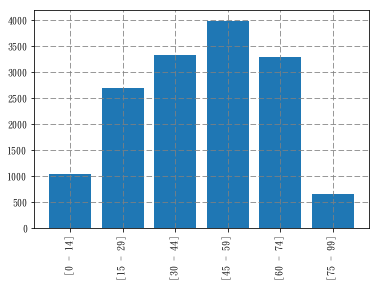

In [41]:
bar_chart(age_cutted_number)

In [42]:
#(def)依照不同age，建立新的物件list：需要 1.(def)age_cutters 2.(class_list)sample_ls
def object_cutter_by_age(age_cutters,sample_ls):
    week_filtered_by_age_ls = []
    for i in range(len(age_cutters)):
        object_ls_cutted_by_age_bool = list(age_cutters[i][0] <= int(p.age) <= age_cutters[i][1] for p in sample_ls)
        sample_ls_fil_by_age = [] 
        for j in range(len(sample_ls)):
            if object_ls_cutted_by_age_bool[j]:
                sample_ls_fil_by_age.append(sample_ls[j])
        week_filtered_by_age = list(p.week for p in sample_ls_fil_by_age)
        week_filtered_by_age_ls.append([age_cutters[i],week_filtered_by_age])
    return week_filtered_by_age_ls

#回傳為:filter過後的list為
#'''
#[[? - ? 歲],[20,30,40,50,50(週別)],
#             ...
# [? - ? 歲],[20,30,40,50,50(週別)]]
# '''

In [43]:
#需要:1.(def)age_cutters 2.(class_list)sample_ls 3.(def)object_cutter_by_age 
#是否設定顏色？
#title年分不同？

def DrawEpiCurve(age_cutter,sample_ls,ylim = (-10,630),dist_name='',Show=True):
    object_filtered_ls = object_cutter_by_age(age_cutter ,sample_ls)
    

    colors = ['red','blue','yellow','limegreen','purple','goldenrod']
    plt.figure(figsize=(25,10))
    
    for i in range(len(object_filtered_ls)):
        xy = object_filtered_ls[i][1]
        xy_set = set(xy)
        x = []
        y = []    
        for j in range(len(xy_set)):
            try:
                xy_pop = xy_set.pop()
                x.append(int(xy_pop))
                y.append(xy.count(xy_pop))
            except:
                continue
        if x != []:
            x.append(min(x)-1)
            y.append(0)
        x.append(-1)
        y.append(0) 
        
        xy=[]
        for j in range(len(x)):
            xy.append([x[j],y[j]])

        xy_sorted = sorted(xy , key=lambda k: [k[0], k[1]])


        x = []
        y = []
        for j in range(len(xy_sorted)):
            x.append(xy_sorted[j][0])
            y.append(xy_sorted[j][1])
        #print(x)
        #print(y)
        plt.plot(x, y,color=colors[i],linewidth=3.0)
        
    legend_age = []
    for i in range(len(age_cutter)-1):
        min1 = age_cutter[i][0]
        max1 = age_cutter[i][1]
        legend_age.append('%d - %d years old'%(min1,max1))
    legend_age.append('%d + years old'%age_cutter[-1][0])
    if dist_name=='':
        plt.title('%d KaoHsiung City Epidemic Curve'%(int(file_name[0:3])+1911),fontsize=30)
    elif dist_name != '':
        plt.title('%d KaoHsiung City Epidemic Curve(%s區)'%(int(file_name[0:3])+1911,dist_name),fontsize=30)
    plt.legend(legend_age,fontsize=25)
    plt.xlabel('Week',fontsize=28)
    plt.ylabel('Case Number',fontsize=28)
    plt.tick_params(axis='both', labelsize=20)

    #xticks = ['1']
    #for i in range(1,53):
    #    xticks.append(str(i))
    
    plt.xticks(list(range(55)),rotation=90)
    plt.grid(linestyle='--', which='major',color='gray')
    plt.xlim((-2,55))
    plt.ylim((ylim[0],ylim[1]))
    if Show:
        plt.show()
 

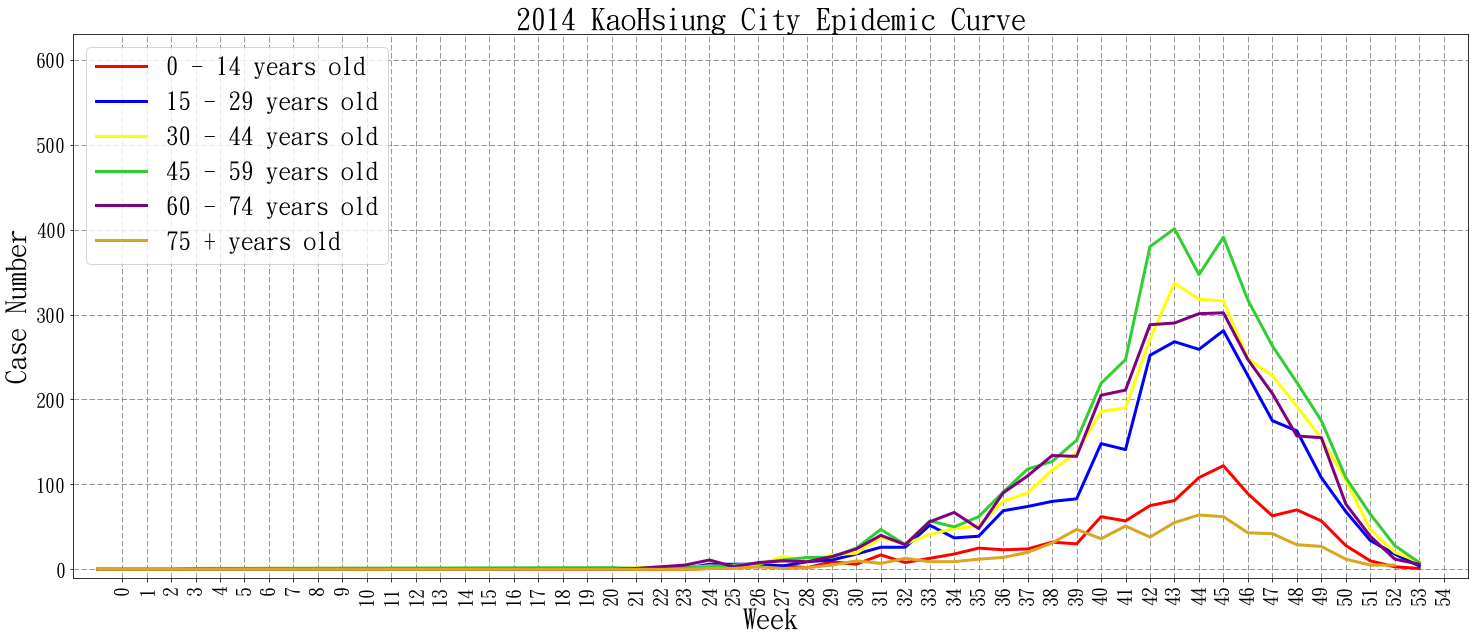

In [44]:
DrawEpiCurve(age_cutter,sample_ls)


In [45]:
#(def)取得所有某欄位的內容(Set回傳)，需要: 1.(dataframe)file_df


def get_df_SpecificColContent_ReturnSet(file_df):
    ColName = input('輸入想收尋的欄位名稱:')
    return set(file_df.ix[:,ColName])

#回傳值:Set()

In [46]:
#(def)切割區別，需要: 1.(class_list)sample_ls 2.(def)get_df_SpecificColContent_ReturnSet
def distinct_cutters(sample_ls,get_df_SpecificColContent_ReturnSet):
    GDSR = get_df_SpecificColContent_ReturnSet   #名稱縮寫
    dists_class_list = []
    GDSR_list = []
    for i in range(len(GDSR)):
        DistName = GDSR.pop()
        try:
            list_TorF = list(p.dist == DistName for p in sample_ls)  
            dist_class_list = []
            for j in range(len((sample_ls))):
                if list_TorF[j]:
                    dist_class_list.append(sample_ls[j])
            dists_class_list.append(dist_class_list)
            GDSR_list.append(DistName)
        except:
            continue
    return dists_class_list,GDSR_list

#回傳該 1.區別的(class_list) 與 2.相對應的區別名稱(list):
#[[某區的class_list],[某區的class_list],...,[某區的class_list]]

In [47]:
sample_ls_dist_fil, sample_ls_dist_fil_name = distinct_cutters(sample_ls,get_df_SpecificColContent_ReturnSet(file_df))
 

輸入想收尋的欄位名稱:區別


In [51]:
#DrawEpiCurve(age_cutter,sample_ls,ylim = (-10,630),dist_name='',Show=True)
#設定：ylim

while True:
    save_select = input('是否存檔(y/n):')
    if save_select == 'y':
        os.chdir('D:\\YAO\\output')
        makedir = input('請建立儲存資料夾名稱:')
        os.mkdir(makedir)
        os.chdir('D:\\YAO\\output'+'\\'+makedir)

        for i in range(len(sample_ls_dist_fil_name)):
            DrawEpiCurve(age_cutter,sample_ls_dist_fil[i],ylim = (-5,150),dist_name=sample_ls_dist_fil_name[i],Show=False)
            plt.savefig('%s年%sEpicurve.png'%(file_name[0:3],sample_ls_dist_fil_name[i]))
        os.chdir('../')
        break

    elif save_select == 'n':
        for i in range(len(sample_ls_dist_fil_name)):
            DrawEpiCurve(age_cutter,sample_ls_dist_fil[i],ylim = (-5,150),dist_name=sample_ls_dist_fil_name[i])
        break

    else :
        print('請輸入(y/n)')
        continue

是否存檔(y/n):y
請建立儲存資料夾名稱:103年epicurve


C:\Users\jean\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
